# Preparing Data
Import the necessary packages

In [1]:
from defs import *

Read the .csv file, and identify labels and data information

In [2]:
X, Y = read_data()

Here, we have all the data as matrices now. It should be also noted that these feature vectors are <b>not normalized</b>.

In [3]:
X

array([[-1.44400597e+00,  5.18970251e+01,  9.05120609e+00, ...,
         8.57554284e-02,  8.20069854e-02,  7.81689946e-02],
       [-2.33627319e+00,  3.56443882e+01,  6.44365415e+00, ...,
         1.01811667e-01,  9.42809508e-02,  8.64167578e-02],
       [-3.16045284e+00,  4.03782177e+01,  6.12616548e+00, ...,
         1.32412857e-01,  1.27756782e-01,  1.22951207e-01],
       ...,
       [ 7.01717377e+00,  1.15095520e+01,  9.47990536e+00, ...,
         7.08734220e-03,  6.78918040e-03,  6.48899640e-03],
       [ 5.22433281e+00,  1.65613079e+01,  9.61058281e+00, ...,
         5.41446600e-03,  5.00466440e-03,  4.60542100e-03],
       [ 2.76707172e+00,  1.78901052e+01,  9.44907018e+00, ...,
         1.51198740e-02,  1.34250538e-02,  1.17479004e-02]])

In addition, our labels are also mapped into integers, and can be recognized by MLP's.

In [4]:
Y

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [5]:
X_NORM, scaler_x = min_max_scale(X)
X_NORM

array([[0.79833565, 0.76649978, 0.9357153 , ..., 0.16806706, 0.16701945,
        0.16635446],
       [0.78131085, 0.49995619, 0.73437233, ..., 0.19925201, 0.19167039,
        0.18352149],
       [0.76558519, 0.57759109, 0.70985734, ..., 0.25868665, 0.25890299,
        0.2595649 ],
       ...,
       [0.95977819, 0.10414436, 0.96881745, ..., 0.01527533, 0.01595259,
        0.01715851],
       [0.9255701 , 0.18699326, 0.97890775, ..., 0.01202622, 0.01236858,
        0.01323801],
       [0.87868462, 0.20878557, 0.9664365 , ..., 0.03087638, 0.02928003,
        0.02810448]])

Now, we can reduce the dimensionality of X into two, and check how much of the variance of the data it explains

In [6]:
pca = PCA(n_components=2)
X_NORM_REDUCED = pca.fit_transform(X_NORM)
explained = np.sum(pca.explained_variance_ratio_) * 100
explained

46.208814826269

It can explain only 46.21 % of the variance, however, we need to work with 2 dimensions in order to work with K-Means algorithm, therefore can not include more than 2.

In [7]:
X_NORM_REDUCED

array([[-1.10435901, -0.2962419 ],
       [ 2.92207579,  0.21510375],
       [ 0.0176331 ,  2.20907132],
       ...,
       [-1.57854779, -0.7770075 ],
       [-1.59268692, -1.10347865],
       [-1.40285191, -1.13853638]])

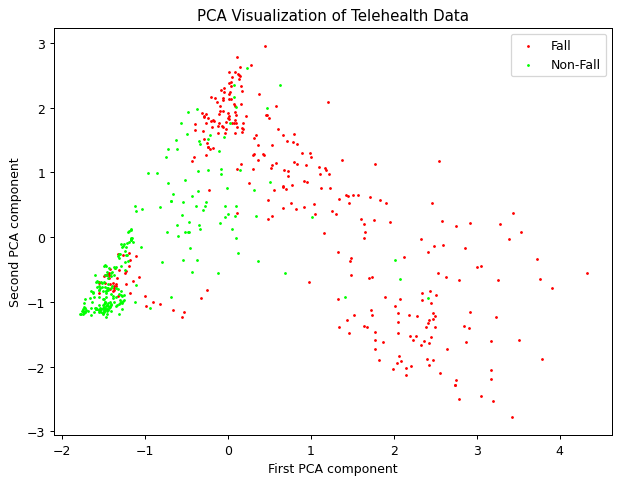

In [8]:
plot_pca(X_NORM_REDUCED, Y)

In the plot above, we can observe that we have some clusters with similar classes. However, these clusters are not-so-easy clusters, and just choosing 2 clusters for K-Means may not perform well.

In addition, we are not going to use these labels while using K-Means. So, this will be the data what K-Means will see while forming clusters:

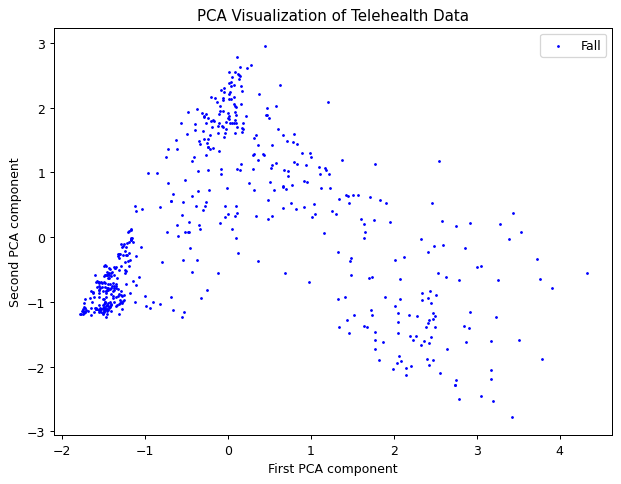

In [9]:
plot_pca(X_NORM_REDUCED, Y, show_labels=False)

# PART A
Since we have performed the necessary preprocessing steps, we can start with `K = 2` to analyze the telehealth data.

In [10]:
k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(X_NORM_REDUCED)
y_predict = k_means.predict(X_NORM_REDUCED)

# Figure out which labels from K-Means correspond to Fall
accuracy_1 = metrics.accuracy_score(Y, y_predict)
accuracy_2 = metrics.accuracy_score(Y, 1 - y_predict)
print("Consistency with ground truth:", max(accuracy_1, accuracy_2))

Consistency with ground truth: 0.6554770318021201


65.55 % accuracy is not bad for K-Means. However, for health applications, it is super important that those applications work with accuracy higher than at least 90 %. Therefore, we will increase the K-value to get better clusters.

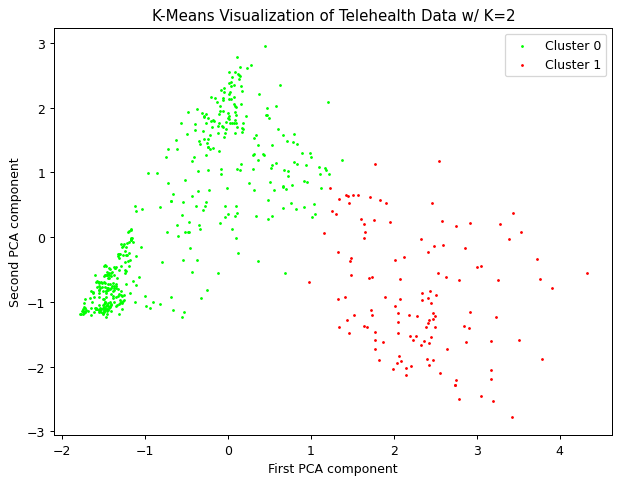

In [11]:
plot_clustered_data(X_NORM_REDUCED, y_predict, 2)

We will try different values of `K = [2, 3, 4, 5, 6, 7, 8, 9, 10]`, and see how clusters are formed and compute the mean uniqueness of each cluster. That is if a cluster is, say 90 %, fall, we will compute its error ratio based on this type. Then we will compute the mean error ratio for each cluster and compute an error ratio for each K value.



Compute the accuracy for K = 3
Cluster 0 was mostly predicted as Fall.
Consistency with ground truth for the cluster 0 = 0.9568965517241379
Cluster 1 was mostly predicted as Fall.
Consistency with ground truth for the cluster 1 = 0.7416267942583732
Cluster 2 was mostly predicted as Non-Fall.
Consistency with ground truth for the cluster 2 = 0.8049792531120332
Weighted average of accuracies of all clusters for this K : 0.8127208480565371




Compute the accuracy for K = 4
Cluster 0 was mostly predicted as Non-Fall.
Consistency with ground truth for the cluster 0 = 0.8025210084033614
Cluster 1 was mostly predicted as Fall.
Consistency with ground truth for the cluster 1 = 0.96
Cluster 2 was mostly predicted as Fall.
Consistency with ground truth for the cluster 2 = 0.7446808510638298
Cluster 3 was mostly predicted as Fall.
Consistency with ground truth for the cluster 3 = 0.7471264367816092
Weighted average of accuracies of all clusters for this K : 0.8074204946996467




Compute the a

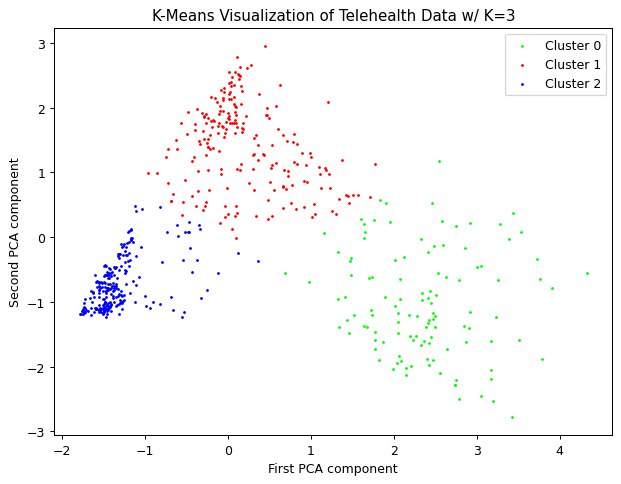

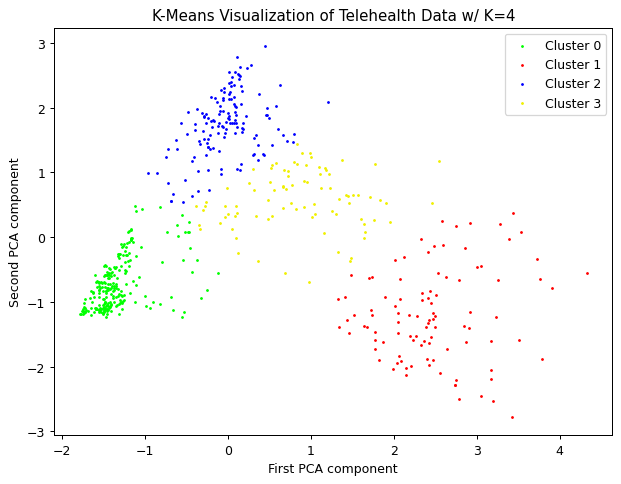

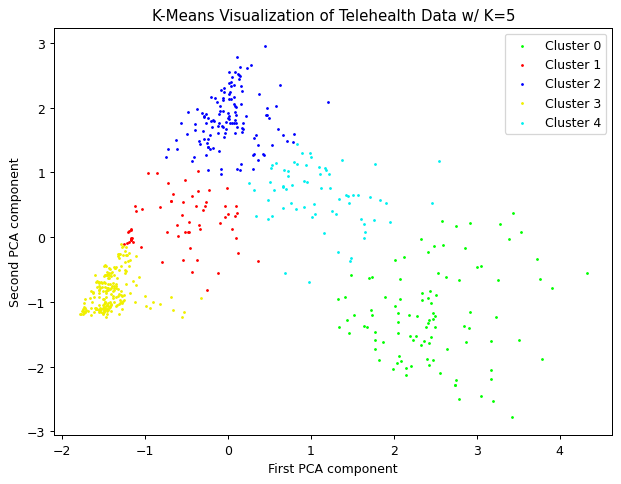

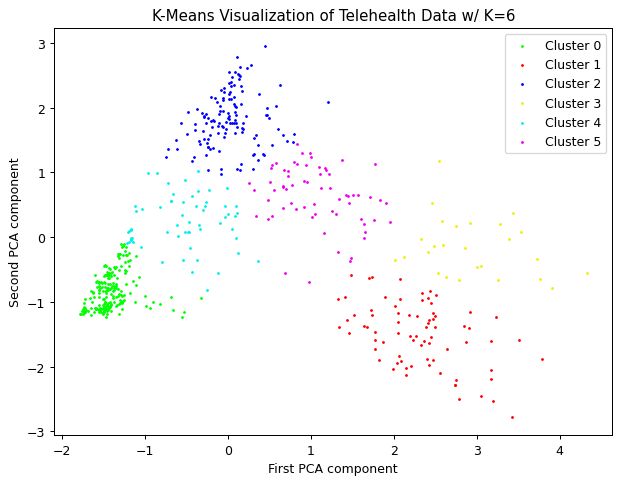

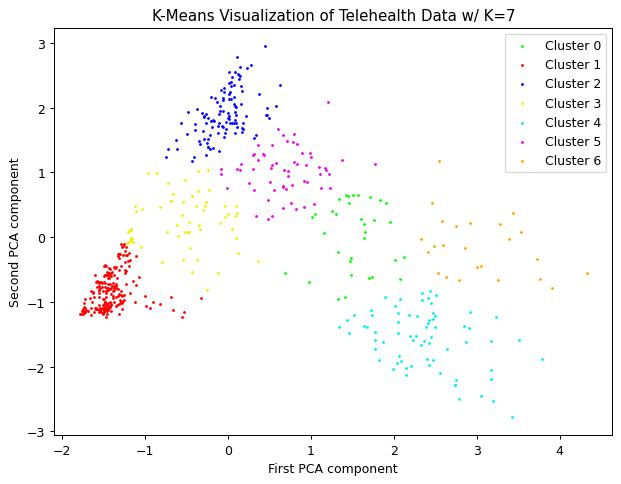

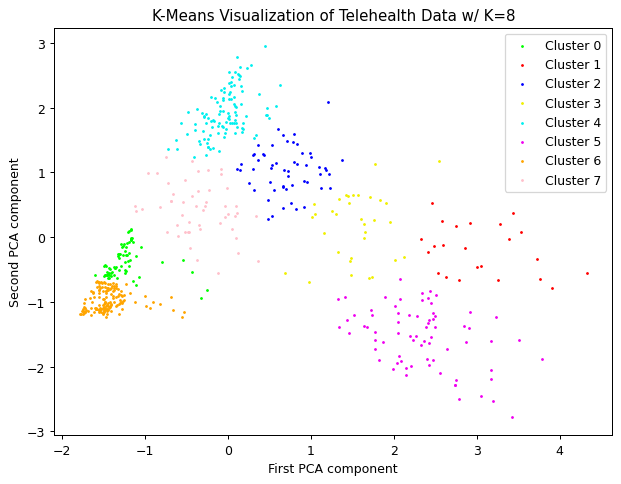

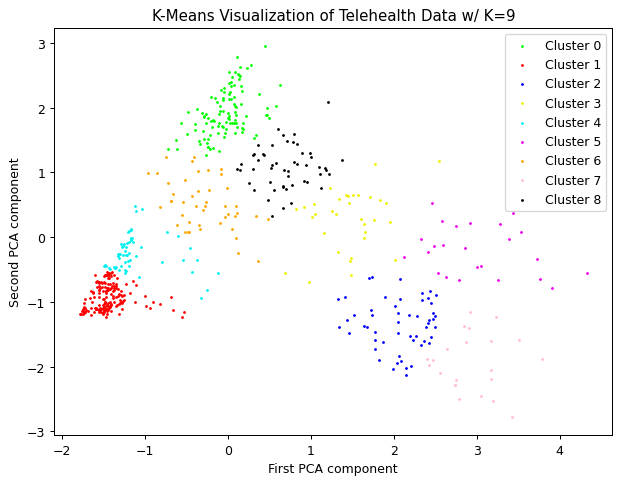

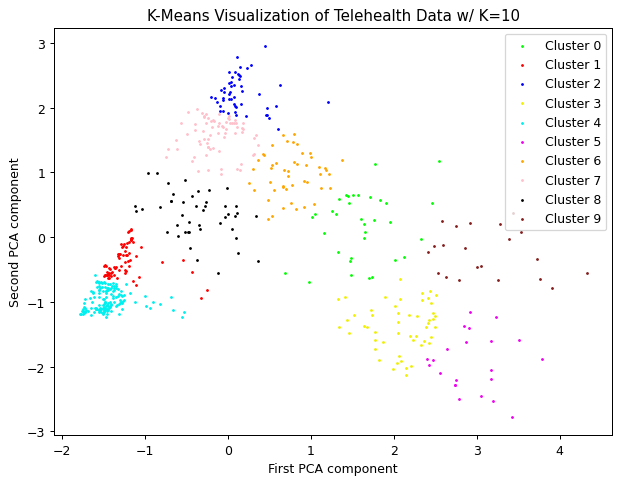

In [39]:
K_s = [i+3 for i in range(8)]
for k_ in K_s:
    k_means = KMeans(n_clusters=k_, random_state=42)
    k_means.fit(X_NORM_REDUCED)
    y_predict = k_means.predict(X_NORM_REDUCED)

    # Plot the clusters
    plot_clustered_data(X_NORM_REDUCED, y_predict, k_)

    # Figure out which clusters correspond to Fall and
    # compute the overall accuracy of this setting
    print(f"\n\n===================================")
    print(f"Compute the accuracy for K = {k_}")
    accuracy_k_ = []
    for k_i in range(k_):
        # indexes_k_i = np.where(y_predict == k_i, y_predict, -1)
        indexes_k_i = np.where(y_predict == k_i)[0]
        Y_k_i = Y[indexes_k_i]
        len_cluster = len(indexes_k_i)
        accuracy_for_this_cluster_fall = metrics.accuracy_score(Y_k_i, [1 for _ in range(len_cluster)])
        accuracy_for_this_cluster_non_fall = metrics.accuracy_score(Y_k_i, [0 for _ in range(len_cluster)])
        cluster_id = 1 if accuracy_for_this_cluster_fall > accuracy_for_this_cluster_non_fall else 0
        max_accuracy = max(accuracy_for_this_cluster_fall, accuracy_for_this_cluster_non_fall)
        print(f"Cluster {k_i} was mostly predicted as {'Fall' if cluster_id else 'Non-Fall'}.")
        accuracy_k_.append(max_accuracy)
        print(f"Consistency with ground truth for the cluster {k_i} = {max_accuracy}")
    weighted_avg = 0
    for i in range(len(accuracy_k_)):
        indexes_k_i = np.where(y_predict == i)[0]
        Y_k_i = Y[indexes_k_i]
        len_cluster = len(indexes_k_i)
        weighted_avg += len_cluster * accuracy_k_[i] / len(Y)
    print(f"Weighted average of accuracies of all clusters for this K : {weighted_avg}")
    print("======================================\n\n")

As we can see from these plots, the accuracy won't improve above apx. 85 %. We could set K larger than 10, however, the problem is not tuning K here, in my opinion. The issue is caused more by large number of overlapping PCA components in southwest region of the 2D coordinate system. Therefore, 2D visualization may not be enough to make a better fall detection of the telehealth data.

# PART B
We had observed that, from Project 1 of this course, using approximately 20-30 PCA components of a data set with 400 features performed the best. That's why, in this part of the project, we will be using first 25 PCA components to analyze the rest of the data. In addition, first 25 PCA components already explain 92.49 % of the variance in the data.

In [41]:
pca_b = PCA(n_components=25)
X_NORM_REDUCED_B = pca_b.fit_transform(X_NORM)
explained_b = np.sum(pca_b.explained_variance_ratio_)
str(explained_b * 100) + " %"

'92.49058053164411 %'

After performing training (70 %) on each hyperparameter setting in each classifier, the accuracy will be tested on the validation set (15 %). Then, the model with maximum accuracy will be selected to measure the accuracy using the test set (15 %).

In [ ]:
# SPLIT
X_NORM_REDUCED_B_TRAIN, X_NORM_REDUCED_B_TEST, Y_TRAIN, Y_TEST = train_test_split(
    X_NORM_REDUCED_B, Y, test_size=0.30, random_state=42)
X_NORM_REDUCED_B_VALID, X_NORM_REDUCED_B_TEST, Y_VALID, Y_TEST = train_test_split(
    X_NORM_REDUCED_B_TEST, Y_TEST, test_size=0.50, random_state=42)

## Support Vector Machines (SVM) Classifier
For this part, the following hyperparameters will be tuned:<br>
```
c_values        = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]
kernel_types    = ["poly", "rbf", "sigmoid"]
degrees         = [2, 3, 4, 5]
gamma_values    = ["scale", "auto"]
```
Linear SVM will not be tuned because we already know that non-linearity in learning a model is always better. In fact, most classifiers use RBF as the kernel for SVM's, but we will also try sigmoid and polynomial kernels for this data set.


In [ ]:
c_values        = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]
kernel_types    = ["poly", "rbf", "sigmoid"]
degrees         = [2, 3, 4, 5]
gamma_values    = ["scale", "auto"]
c_, kernel_type, degree, gamma, val_accuracy_svm = find_best_svm(X_NORM_REDUCED_B_TRAIN, Y_TRAIN, X_NORM_REDUCED_B_VALID, Y_VALID, c_values, kernel_types, degrees, gamma_values)

# Evaluate the best SVM with the test set

## Multi-Layer Perceptron (MLP) Classifier
For this part, the following hyperparameters will be tuned:<br>
```
learning_rates          = [1e-2, 5e-2, 1e-3, 5e-4, 1e-4]
alphas                  = [1, 1e-1, 1e-2, 1e-3]
solvers                 = ["adam", "sgd"]
activation_functions    = ["relu"]
```
We will use ReLU only, as our activation function. From the deep learning seminar's of this course, we can understand that some non-linear activation functions cause the gradient to vanish/explode. Therefore, we will use ReLU as our activation function and tune other parameters.

In [ ]:
learning_rates = [1e-2, 5e-2, 1e-3, 5e-4, 1e-4]
alphas = [1, 1e-1, 1e-2, 1e-3]
solvers = ["adam", "sgd"]
# activation_functions = ["relu"]
learning_rates, alphas, solvers, val_accuracy_mlp = find_best_mlp(X_NORM_REDUCED_B_TRAIN, Y_TRAIN, X_NORM_REDUCED_B_VALID, Y_VALID, learning_rates, alphas, solvers)

# Evaluate the best MLP with the test set
